In [ ]:
import Pkg
Pkg.activate("../../../")

In [1]:
using Pkg
Pkg.activate("..")

using Flux

using CSV
using DataFrames

using Random
Random.seed!(42)

df = CSV.read("data1.csv", DataFrame)
x = Matrix(df[:, 1:2])
x = [x[i, :] for i in 1:size(x, 1)]
y = df[:, 3]

X = hcat(x...)
y_train = Flux.onehotbatch(y, unique(y))
y_train = Flux.unstack(y_train',1)

  Activating project at `C:\Users\Lenovo\Desktop\SP\LaplaceRedux.jl\dev`


100-element Vector{Vector{Bool}}:
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 [1, 0, 0, 0]
 ⋮
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]
 [0, 0, 0, 1]

In [2]:
data = zip(x,y_train)
n_hidden = 3
D = size(X,1)
out_dim = length(unique(y))
nn = Chain(
    Dense(D, n_hidden, σ),
    Dense(n_hidden, out_dim)
)  
loss(x, y) = Flux.Losses.logitcrossentropy(nn(x), y)

loss (generic function with 1 method)

In [ ]:
using Flux.Optimise: update!, Adam
using Statistics
opt = Adam()
epochs = 200
avg_loss(data) = mean(map(d -> loss(d[1],d[2]), data))
show_every = epochs/10

for epoch = 1:epochs
    for d in data
        gs = gradient(Flux.params(nn)) do
            l = loss(d...)
        end
        update!(opt, Flux.params(nn), gs)
    end
    if epoch % show_every == 0
        println("Epoch " * string(epoch))
        @show avg_loss(data)
    end
end

In [3]:
py_layer1 = [[-2.7541,  0.5183],
         [ 3.5415,  0.1424],
         [ 0.1192, -4.3529]]

py_layer1 = hcat(py_layer1...)
py_layer1 = py_layer1'

py_layer2 = [-0.9672,  1.5726, -2.0302]

py_layer3 = [[-5.3452,  2.9503, -8.0299],
         [ 0.5926, -7.3648,  4.3767],
         [-5.9890,  0.3879,  3.8754],
         [ 3.0135, -6.8771, -7.4405]]
py_layer3 = hcat(py_layer3...)
py_layer3 = py_layer3'

py_layer4 = [ 1.5361, -1.5164, -1.5870,  1.8060]

4-element Vector{Float64}:
  1.5361
 -1.5164
 -1.587
  1.806

In [4]:
Flux.params(nn)[1] .= py_layer1
Flux.params(nn)[2] .= py_layer2
Flux.params(nn)[3] .= py_layer3
Flux.params(nn)[4] .= py_layer4

4-element Vector{Float32}:
  1.5361
 -1.5164
 -1.587
  1.806

In [5]:
using LaplaceRedux
la = Laplace(nn; likelihood=:classification)
fit!(la, data)
optimize_prior!(la; verbose=true, n_steps=100)

loss(exp.(logP₀), exp.(logσ)) = 76.3983638723146
Log likelihood: -0.3166475598676567
Log det ratio: 0.011130951499612962
Scatter: 152.15230167339428
loss(exp.(logP₀), exp.(logσ)) = 35.730763056069186
Log likelihood: -0.3166475598676567
Log det ratio: 0.023856790808153505
Scatter: 70.80437420159491
loss(exp.(logP₀), exp.(logσ)) = 20.834385839586446
Log likelihood: -0.3166475598676567
Log det ratio: 0.04105894778344066
Scatter: 40.994417611654136
loss(exp.(logP₀), exp.(logσ)) = 14.34105783677368
Log likelihood: -0.3166475598676567
Log det ratio: 0.05990449000151443
Scatter: 27.988916063810535
loss(exp.(logP₀), exp.(logσ)) = 10.974409181519556
Log likelihood: -0.3166475598676567
Log det ratio: 0.07864599251270477
Scatter: 21.236877250791096
loss(exp.(logP₀), exp.(logσ)) = 8.951540638527842
Log likelihood: -0.3166475598676567
Log det ratio: 0.09689235269912899
Scatter: 17.172893804621243


[ Info: Iteration 10: P₀=0.3845887342688898, σ=1.0
[ Info: Iteration 20: P₀=0.17896912735072892, σ=1.0
[ Info: Iteration 30: P₀=0.1036198007388621, σ=1.0
[ Info: Iteration 40: P₀=0.0707463619291495, σ=1.0
[ Info: Iteration 50: P₀=0.05367952802473911, σ=1.0
[ Info: Iteration 60: P₀=0.04340717438655891, σ=1.0
[ Info: Iteration 70: P₀=0.036478796423013334, σ=1.0


loss(exp.(logP₀), exp.(logσ)) = 7.590014383739459
Log likelihood: -0.3166475598676567
Log det ratio: 0.11486827189492033
Scatter: 14.431865375848684
loss(exp.(logP₀), exp.(logσ)) = 6.597278044943024
Log likelihood: -0.3166475598676567
Log det ratio: 0.13289034330577465
Scatter: 12.42837062684496
loss(exp.(logP₀), exp.(logσ)) = 5.833819257534217
Log likelihood: -0.3166475598676567
Log det ratio: 0.1511864467194357
Scatter: 10.883156948613685
loss(exp.(logP₀), exp.(logσ)) = 5.225726009146256
Log likelihood: -0.3166475598676567
Log det ratio: 0.16987995036078019
Scatter: 9.648276948196418


[ Info: Iteration 80: P₀=0.03141465016193548, σ=1.0
[ Info: Iteration 90: P₀=0.02750888096784476, σ=1.0
[ Info: Iteration 100: P₀=0.024387528670763547, σ=1.0


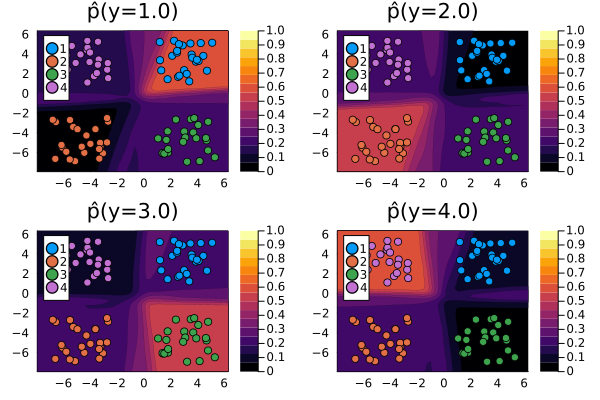

In [6]:
using Plots
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1))
    push!(plt_list, plt)
end
plot(plt_list...)

In [7]:
predictions_probit = reduce(hcat, predict(la, X))
predictions_probit = reshape(predictions_probit, 4, 100)

4×100 Matrix{Float64}:
 0.596343   0.60566    0.602541   …  0.129745   0.129856   0.129872
 0.0597063  0.0583843  0.0589778     0.213959   0.213915   0.213913
 0.226199   0.22235    0.223071      0.0672052  0.0672461  0.0672512
 0.117752   0.113605   0.115411      0.589091   0.588982   0.588964

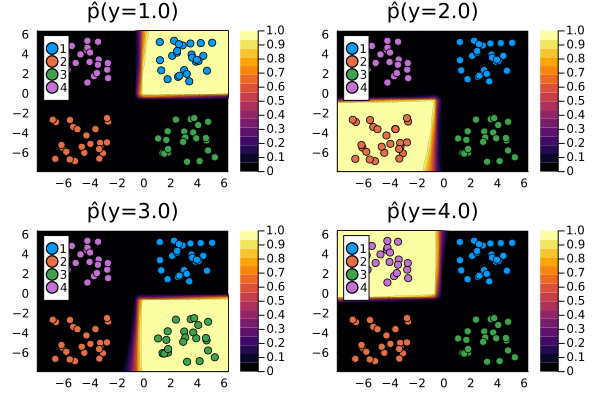

In [8]:
_labels = sort(unique(y))
plt_list = []
for target in _labels
    plt = plot(la, X, y; target=target, clim=(0,1), link_approx=:plugin)
    push!(plt_list, plt)
end
plot(plt_list...)

In [9]:
predictions_plugin = reduce(hcat, predict(la, X, link_approx=:plugin))
predictions_plugin = reshape(predictions_plugin, 4, 100)

4×100 Matrix{Float64}:
 0.996563    0.996545    0.996557    0.996545    …  0.000179636  0.000179702
 1.67368e-6  1.56004e-6  1.63622e-6  1.56281e-6     0.00319589   0.00319498
 0.00335778  0.00338301  0.00336643  0.0033827      4.15063e-6   4.15065e-6
 7.77686e-5  7.04509e-5  7.53181e-5  7.0618e-5      0.99662      0.996621

In [10]:
fμ, fvar = glm_predictive_distribution(la, X)

([4.423090576956424 4.486165476887683 … -3.8057652938291877 -3.805873866752483; -8.873953181762996 -8.881173750240514 … -0.9270769126207038 -0.927841712037154; -1.2699402257766677 -1.1993627116325856 … -7.5734381192258144 -7.573910786757107; -5.035238753078503 -5.070967622700069 … 4.81542713694096 4.814949704004084], [85.07411191295597 79.53361243786075 … 81.34320315543948 81.35023021316852; 81.20688736353765 81.1536781758808 … 78.90926762999776 78.92126677620485; 85.99762722263728 79.04493589465771 … 81.13517110036102 81.14116985128591; 83.10733255182367 81.35984326877417 … 79.39381935767847 79.40498711455407])

In [11]:
@show fμ

fμ = [4.423090576956424 4.486165476887683 4.443674731667537 4.484612556056829 4.477839994265484 4.486377466524603 4.481124561864351 4.486329636429604 4.482369365140613 4.4666667467476335 4.467781235890392 3.5401267342081133 4.466368425119182 4.484477301141952 4.486160466911278 4.485553737691663 4.485771552235472 4.4506998728944875 4.486255716880294 4.485280344883077 4.486301831810518 4.2991423155527935 4.093084507708902 4.48618285540587 4.478194012957866 -11.799243518951075 -11.838917090464282 -11.83475268540967 -11.83898714392255 -11.835712064739413 -11.838877733984855 -11.837499456467462 -11.838357070315652 -11.838062938765708 -11.808887220650668 -11.810714624872995 -11.768566010221123 -11.838569858216523 -11.838655753373347 -11.838893862297864 -11.815748150313103 -11.813026694350919 -11.837778787348775 -11.834674993805052 -11.838964730890783 -11.747203467903162 -11.794496521084845 -11.838061342353079 -11.838990551162965 -11.838994354189524 -3.5430879785968736 -3.5435888582868724 -3.

4×100 Matrix{Float64}:
  4.42309   4.48617   4.44367   4.48461  …  -3.8091  -3.80577   -3.80587
 -8.87395  -8.88117  -8.87599  -8.88095     -0.9238  -0.927077  -0.927842
 -1.26994  -1.19936  -1.24678  -1.20101     -7.576   -7.57344   -7.57391
 -5.03524  -5.07097  -5.04667  -5.07015      4.8195   4.81543    4.81495

In [12]:
@show fvar

fvar = [85.07411191295597 79.53361243786075 80.99196355037941 79.53515520193561 79.6321411981551 79.53350899185551 79.53992741431622 79.53351565387979 79.5379523535014 80.05160456421174 79.87261692186749 809.6575391053308 79.95069151777913 79.53935129204282 79.53356228221676 79.53434644300461 79.53392499515581 79.77304582376965 79.53352853220983 79.53382370641157 79.53350768198248 89.86624070364314 152.71208102094818 79.533555125243 79.56822842178988 122.31135432129017 121.91675972651481 121.87281031573073 121.91760607041984 121.88651082529853 121.91602699439228 121.90006224892278 121.90882534148838 121.90959645795965 122.95893195549127 121.91619514976645 130.1725819073597 121.91384065386003 121.91288604219815 121.9162089515536 122.36800975471795 122.72306530523885 121.9087752316123 121.87243633601483 121.91726211411185 131.55756843969166 125.69161206778801 121.90478797976256 121.91765961925836 121.91771327585153 119.77307924480851 119.7768901860326 119.77701505364368 119.7708293317316

4×100 Matrix{Float64}:
 85.0741  79.5336  80.992   79.5352  …  81.3182  81.3729  81.3432  81.3502
 81.2069  81.1537  81.1569  81.153      78.8804  78.9353  78.9093  78.9213
 85.9976  79.0449  80.8751  79.0469     81.111   81.1651  81.1352  81.1412
 83.1073  81.3598  81.8111  81.3598     79.3665  79.4199  79.3938  79.405

In [13]:
@show la.posterior.H

la.posterior.H = [2.7779571178136925e-8 8.955047251559692e-8 3.428920784061061e-10 -2.166000889435435e-9 -8.358766004795372e-10 -2.7258797625975897e-10 2.057098347305559e-8 1.9403676472207582e-10 -1.48263141026037e-10 -3.185359701793279e-8 6.417581184130059e-7 7.256364363030741e-8 1.1231203097867388e-7 2.9065741778906177e-8 -1.7794458310052097e-9 4.404236720021929e-8 -6.806946837468408e-7 -9.184007601515307e-8 -1.2450080151015635e-7 9.870852780943306e-9 2.105587793051288e-8 6.502702084107666e-7 1.4028099289193737e-7 -6.713129016626011e-7 -1.192383247802685e-7; 8.955047251559692e-8 3.4268088849865607e-7 -2.1660009455893378e-9 -3.048566522948471e-8 -2.7258795813664844e-10 -4.619683042498207e-10 7.15383749024983e-8 -1.9498268230224877e-9 -2.508719274414394e-10 -2.373312595570453e-7 -9.106183842294739e-9 -2.545151497067151e-7 -1.9237982976441478e-7 -1.0160294300780615e-7 -1.8794659611473143e-7 2.298620241660374e-7 8.26189221953685e-9 3.832069670240234e-7 1.9984904508404024e-7 1.02447247562

25×25 Matrix{Float64}:
  2.77796e-8    8.95505e-8    3.42892e-10  …  -6.71313e-7   -1.19238e-7
  8.95505e-8    3.42681e-7   -2.166e-9         3.57948e-8    2.78373e-7
  3.42892e-10  -2.166e-9      1.45154e-9      -1.39403e-7   -4.13269e-8
 -2.166e-9     -3.04857e-8    2.40075e-9      -9.6192e-7    -8.44814e-8
 -8.35877e-10  -2.72588e-10  -2.05529e-10      7.40614e-7    9.85973e-7
 -2.72588e-10  -4.61968e-10  -1.84561e-10  …   2.87477e-7   -9.88894e-8
  2.0571e-8     7.15384e-8    1.94037e-10     -3.48257e-7    5.73679e-8
  1.94037e-10  -1.94983e-9    1.12947e-9      -9.27032e-8    1.78121e-9
 -1.48263e-10  -2.50872e-10  -5.06747e-11      2.1612e-7    -1.99546e-7
 -3.18536e-8   -2.37331e-7    1.83247e-8      -3.44941e-6   -1.53015e-5
  6.41758e-7   -9.10618e-9    1.64314e-7   …  -0.000425291  -7.23919e-6
  7.25636e-8   -2.54515e-7   -6.42756e-8      -0.000135921   2.46446e-8
  1.12312e-7   -1.9238e-7     4.24439e-8      -6.05792e-5   -0.000444777
  2.90657e-8   -1.01603e-7   -2.6119e-8 

In [14]:
@show la.prior.P₀

la.prior.P₀ = [0.024387528670763547 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.024387528670763547 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.024387528670763547 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.024387528670763547 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.024387528670763547 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.024387528670763547 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.024387528670763547 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.024387528670763547 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0; 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0243875

25×25 LinearAlgebra.Diagonal{Float64, Vector{Float64}}:
 0.0243875   ⋅          ⋅         …   ⋅          ⋅          ⋅ 
  ⋅         0.0243875   ⋅             ⋅          ⋅          ⋅ 
  ⋅          ⋅         0.0243875      ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅         …   ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅         …   ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 
  ⋅          ⋅          ⋅             ⋅          ⋅          ⋅ 

In [15]:
using LaplaceRedux.Curvature
𝐉, fμ = Curvature.jacobians(la.est_params.curvature, X)
@show 𝐉

𝐉 = [-0.14119480550289154 0.01565367728471756 -0.1582009345293045 0.07960236072540283 -0.0009967677760869265 0.00011050746979890391 -0.0011168229393661022 0.0005619545700028539 -0.08937378972768784 0.009908498264849186 -0.10013836622238159 0.05038687214255333 -0.005192532204091549 0.0005756743485108018 -0.005817944183945656 0.0029274295084178448 -0.024760577827692032 0.0027451016940176487 -0.02774285152554512 0.013959440402686596 -0.00011513276695040986 1.2764287930622231e-5 -0.00012899986177217215 6.490918894996867e-5 -0.010799111798405647 0.0011972524225711823 -0.012099805288016796 0.006088288966566324 -0.00031217624200508 3.460967491264455e-5 -0.0003497761208564043 0.0001759977312758565 -0.00902992021292448 0.001001109485514462 -0.010117524303495884 0.0050908601842820644 -0.051462139934301376 0.005705392453819513 -0.05766047164797783 0.02901316247880459 -0.04590202122926712 0.005088965408504009 -0.05143066495656967 0.02587849646806717 -0.9223551154136658 0.10225765407085419 -1.03344

25×400 adjoint(::Matrix{Float64}) with eltype Float64:
 -0.141195      0.0156537    -0.158201     …   0.0050903    -0.0025613
 -0.333466      0.03697      -0.37363         -0.00579104    0.00291389
  0.000215963  -0.000539107   2.83945e-5      -0.000548177   0.00971867
  0.00051005   -0.00127323    6.70604e-5       0.00062364   -0.0110565
 -2.52577e-10   1.37667e-10   1.21899e-10     -1.5487e-6     2.9734e-6
 -5.96522e-10   3.25134e-10   2.87894e-10  …   1.7619e-6    -3.38272e-6
 -0.0624663     0.00692538   -0.06999         -0.00188482    0.000948389
  9.55448e-5   -0.000238507   1.25621e-5       0.000202977  -0.00359859
 -1.11743e-10   6.09056e-11   5.39296e-11      5.73448e-7   -1.10098e-6
  0.0118263     0.0           0.0              0.0           0.0
  0.999968      0.0           0.0          …   0.0           0.0
  1.39159e-11   0.0           0.0              0.0           0.0
  0.0           0.0118263     0.0              0.0           0.0
  0.0           0.999968      0.0      